In [1]:
# IMPORTS

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.cluster import KMeans

In [2]:
# Define Constants
POOP_DF_COLUMN_DATE='date'
POOP_DF_COLUMN_DATETIME='datetime'
POOP_DF_COLUMN_HOUR='heure'
POOP_DF_COLUMN_DATETIME_OF_DAY='datetime_ofday'
POOP_DF_COLUMN_NATURE='nature'
POOP_DF_VALUE_NATURE_POOP='caca'
POOP_DF_COLUMN_TIMESTAMP_OF_DAY='timestamp_ofday'

In [3]:
# Loading poop data
# data consolidation: Computing poop date and hour of day as datetime
df_poop=pd.read_csv('../data/poop.csv',sep=';')
df_poop[POOP_DF_COLUMN_DATETIME]=df_poop[[POOP_DF_COLUMN_DATE, POOP_DF_COLUMN_HOUR]].apply(lambda x : datetime.strptime('{}T{}'.format(x.iloc[0],x.iloc[1]), "%Y-%m-%dT%H:%M"), axis=1)
_today=datetime.now().strftime("%Y-%m-%d")
df_poop[POOP_DF_COLUMN_DATETIME_OF_DAY]=df_poop[[POOP_DF_COLUMN_HOUR]].apply(lambda x : datetime.strptime('{}T{}'.format(_today,x.iloc[0]), "%Y-%m-%dT%H:%M"), axis=1)
df_poop[POOP_DF_COLUMN_TIMESTAMP_OF_DAY] = pd.DatetimeIndex(df_poop[POOP_DF_COLUMN_DATETIME_OF_DAY]).asi8

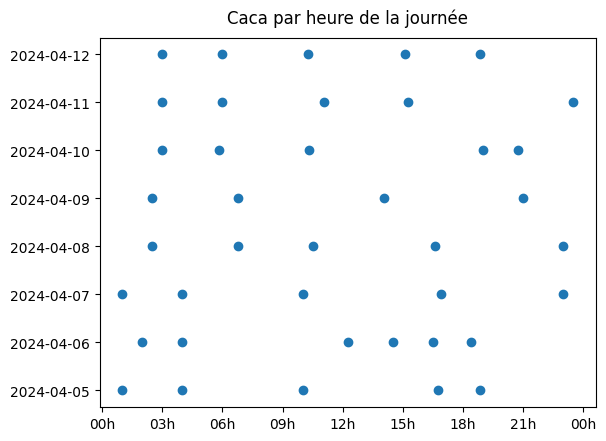

In [4]:
# GRAPH poop by hour of day
# filter on poop oly
df_poop_only=df_poop[df_poop.apply(lambda x: (x[POOP_DF_COLUMN_NATURE] == POOP_DF_VALUE_NATURE_POOP) & (x[POOP_DF_COLUMN_DATE] >= '2024-04-05'), axis=1)]
plt.plot(df_poop_only[POOP_DF_COLUMN_DATETIME_OF_DAY],df_poop_only[POOP_DF_COLUMN_DATE],'o')
plt.title('Caca par heure de la journée', pad=10)
hourFormatter=mdates.DateFormatter('%Hh')
plt.gca().xaxis.set_major_formatter(hourFormatter) 

Avg Nb poop per day: 5.0 (5.0)


<BarContainer object of 8 artists>

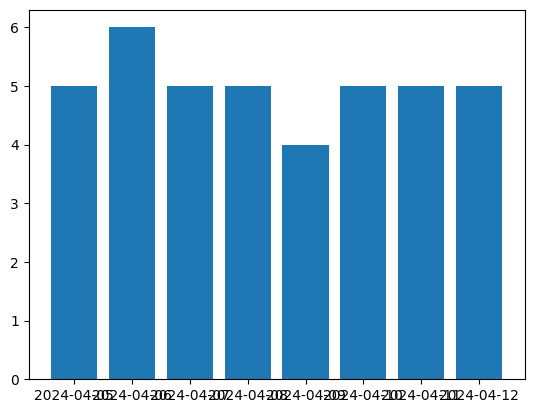

In [5]:
df_poop_group_by_date=df_poop_only.groupby(POOP_DF_COLUMN_DATE).size().to_frame('total').reset_index()
df_poop_group_by_date
# df_poop_only.groupby(POOP_DF_COLUMN_DATE).count() count by line
# group_by.size() -> données par jours
avg_nb_poop_per_day=df_poop_group_by_date['total'].mean()
print(f"Avg Nb poop per day: {round(avg_nb_poop_per_day,0)} ({round(avg_nb_poop_per_day,3)})")

plt.bar(df_poop_group_by_date[POOP_DF_COLUMN_DATE], df_poop_group_by_date['total'])

In [6]:
kmeans = KMeans(n_clusters=round(avg_nb_poop_per_day), random_state=0)
kmeans.fit(df_poop_only[POOP_DF_COLUMN_TIMESTAMP_OF_DAY].array.reshape(-1,1))

KMeans(n_clusters=5, random_state=0)

,datetime_ofday
group_id,
0,2024-04-13 02:43:38.181818112
4,2024-04-13 06:16:00.000000000
3,2024-04-13 10:37:51.428571392
1,2024-04-13 15:42:30.000000000
2,2024-04-13 20:42:13.333333248


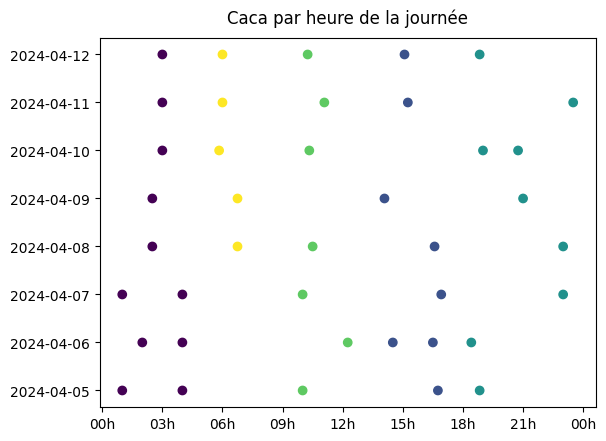

In [7]:
plt.scatter(df_poop_only[POOP_DF_COLUMN_DATETIME_OF_DAY],df_poop_only[POOP_DF_COLUMN_DATE],c=kmeans.labels_)
plt.title('Caca par heure de la journée', pad=10)
hourFormatter=mdates.DateFormatter('%Hh')
plt.gca().xaxis.set_major_formatter(hourFormatter)

df_poop_group_kmean=pd.DataFrame({POOP_DF_COLUMN_DATETIME_OF_DAY:df_poop_only[POOP_DF_COLUMN_DATETIME_OF_DAY],"group_id":kmeans.labels_})
df_poop_group_kmean.groupby('group_id').mean().sort_values(by=POOP_DF_COLUMN_DATETIME_OF_DAY)